In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy

In [2]:
conditions = ['loom', 'rec', 'pps', 'eps']
data_dir = '//kfs/fileserver/Projektdaten/CherISH/data/wp-1/EEG/09_GSRfifData/'
data_files_loom = glob.glob(data_dir + '*loom-ave.fif')
data_files_rec  = glob.glob(data_dir + '*rec-ave.fif')
data_files_pps = glob.glob(data_dir + '*pps-ave.fif')
data_files_eps = glob.glob(data_dir + '*eps-ave.fif')

In [3]:
evokeds_loom = [
        mne.read_evokeds(d)[0]
        for d in data_files_loom
    ]

evokeds_rec = [
        mne.read_evokeds(r)[0]
        for r in data_files_rec
    ]

evokeds_pps = [
        mne.read_evokeds(p)[0]
        for p in data_files_pps
    ]

evokeds_eps = [
        mne.read_evokeds(e)[0]
        for e in data_files_eps
    ]

Reading \\kfs\fileserver\Projektdaten\CherISH\data\wp-1\EEG\09_GSRfifData\s03_loom-ave.fif ...
Isotrak not found
    Found the data of interest:
        t =   -1000.00 ...    4800.00 ms (exported from FieldTrip: averaged data)
        0 CTF compensation matrices available
        nave = 2 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading \\kfs\fileserver\Projektdaten\CherISH\data\wp-1\EEG\09_GSRfifData\s04_loom-ave.fif ...
Isotrak not found
    Found the data of interest:
        t =   -1000.00 ...    4800.00 ms (exported from FieldTrip: averaged data)
        0 CTF compensation matrices available
        nave = 2 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading \\kfs\fileserver\Projektdaten\CherISH\data\wp-1\EEG\09_GSRfifData\s05_loom-ave.fif ...
Isotrak not found
    Found the data of interest:
       

C:\Users\pkovacs\AppData\Local\Temp\ipykernel_2220\27289205.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds([evokeds_loom,evokeds_rec,evokeds_pps,evokeds_eps],


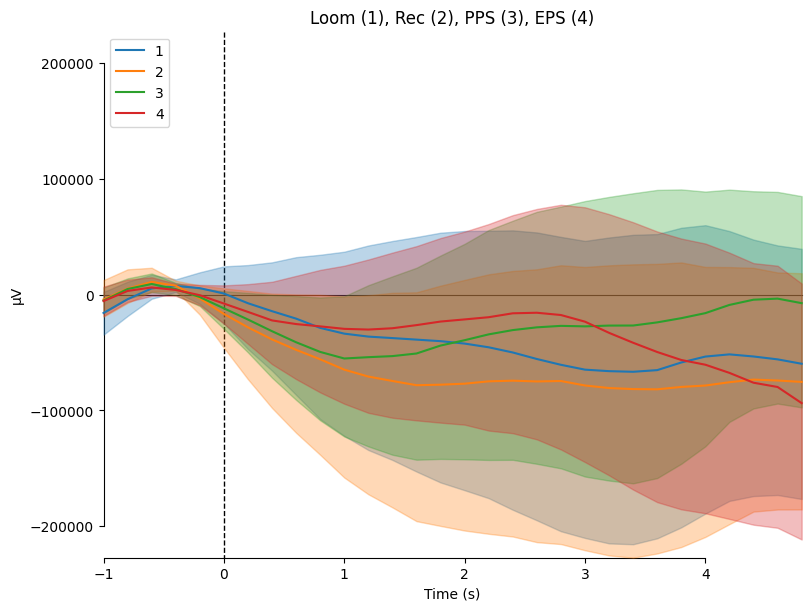

In [6]:
mne.viz.plot_compare_evokeds([evokeds_loom,evokeds_rec,evokeds_pps,evokeds_eps],
                            legend=True,
                             title='Loom (1), Rec (2), PPS (3), EPS (4)'
                            )
plt.show()

In [17]:
n_conditions = len(conditions)
n_observations = len(evokeds_loom) + len(evokeds_rec) + len(evokeds_pps) + len(evokeds_eps)

pval = 0.05  # arbitrary
dfn = n_conditions - 1  # degrees of freedom numerator
dfd = n_observations - n_conditions  # degrees of freedom denominator
thresh = scipy.stats.f.ppf(1 - pval, dfn=dfn, dfd=dfd)  # F distribution

In [18]:
## Cluster-based permutation test
l=np.stack([evo.get_data() for evo in evokeds_loom], axis =0)
l=np.transpose(l, (0,2,1))

r=np.stack([evo.get_data() for evo in evokeds_rec], axis =0)
r=np.transpose(r, (0,2,1))

p=np.stack([evo.get_data() for evo in evokeds_pps], axis =0)
p=np.transpose(p, (0,2,1))

e=np.stack([evo.get_data() for evo in evokeds_eps], axis =0)
e=np.transpose(e, (0,2,1))

X = [l,r,p,e]

# adj,_=mne.channels.find_ch_adjacency(diff_rec_loom[0].info, "eeg")

F_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_test(X,
                                                                threshold=thresh,
                                                                n_permutations=1000,
                                                                tail=0,
                                                                verbose=True)

stat_fun(H1): min=0.09846267449794323 max=0.8462822063663913
Running initial clustering …
Found 0 clusters


C:\Users\pkovacs\AppData\Local\Temp\ipykernel_6768\2655093282.py:18: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  F_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_test(X,
